In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
# import gsw
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

In [2]:
dataroot = '/home/ashao/dev/MOM6_cases/neutral_diffusion/'
cases = ['teos10_layer','teos10_full','teos10_int_drho','teos10_linear','teos10_neutral']
levels = list(range(10,201,10))
levels = [5, 10, 20,40,80,160,200]
print(levels)
# cases = ['teos10_layer','teos10_linear']
output = {key:{} for key in cases}
names = []
for case in cases:
    for lev in levels:
        name = f'{case}_nk{lev}'
        names.append(name)
        output[name] = {}
        print(name)
        output[name]['initial'] = xr.open_dataset(f'{dataroot}/{case}/nk{lev}/Initial_state.nc').isel({'Time':0,'lath':0})
        output[name]['out_nat'] = xr.open_dataset(f'{dataroot}/{case}/nk{lev}/prog.nc').isel({'yh':0})
        output[name]['out_z'] = xr.open_dataset(f'{dataroot}/{case}/nk{lev}/prog_z.nc').isel({'yh':0})

[5, 10, 20, 40, 80, 160, 200]
teos10_layer_nk5
teos10_layer_nk10
teos10_layer_nk20
teos10_layer_nk40
teos10_layer_nk80
teos10_layer_nk160
teos10_layer_nk200
teos10_full_nk5
teos10_full_nk10
teos10_full_nk20
teos10_full_nk40
teos10_full_nk80
teos10_full_nk160
teos10_full_nk200
teos10_int_drho_nk5
teos10_int_drho_nk10
teos10_int_drho_nk20
teos10_int_drho_nk40
teos10_int_drho_nk80
teos10_int_drho_nk160
teos10_int_drho_nk200
teos10_linear_nk5
teos10_linear_nk10
teos10_linear_nk20
teos10_linear_nk40
teos10_linear_nk80
teos10_linear_nk160
teos10_linear_nk200
teos10_neutral_nk5
teos10_neutral_nk10
teos10_neutral_nk20
teos10_neutral_nk40
teos10_neutral_nk80
teos10_neutral_nk160
teos10_neutral_nk200


In [3]:
data = output['teos10_layer_nk200']['initial']
z = -(data['h'].cumsum('Layer') - 0.5*data['h'])
x = np.tile(data['lonh'],(len(z),1))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


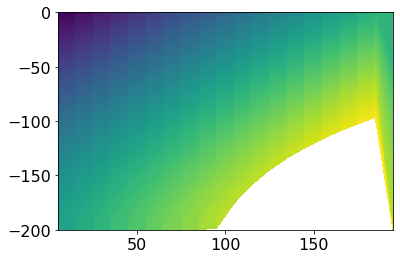

In [4]:
data = output['teos10_layer_nk200']['out_nat']
tidx = 1
z = -(data['e'][tidx,:-1,:].values - 0.5*data['h'][tidx,:,:])
z = np.zeros((data.zi.shape[0],data.xh.shape[0])); z[:,0] = data.e[-1,:,0]; z[:,-1] = data.e[-1,:,0]
z[:,1:-1] = 0.5 * ( data.e[-1,:,:-1] + data.e[-1,:,1:] )


plt.pcolormesh(data.xh.values + z[:-1,:]*0, z[:-1,:], data['salt'][0,:,:].squeeze())

# plt.pcolormesh(x,z,data['rhopot2'][tidx,:,:])

In [5]:
data

<xarray.Dataset>
Dimensions:    (Time: 2, xh: 20, xq: 20, yq: 4, zi: 201, zl: 200)
Coordinates:
  * xq         (xq) float64 10.0 20.0 30.0 40.0 50.0 ... 170.0 180.0 190.0 200.0
    yh         float64 5.0
  * zl         (zl) float64 1.035e+03 1.035e+03 ... 1.036e+03 1.036e+03
  * Time       (Time) object 0001-01-01 01:00:00 0001-01-01 02:00:00
  * xh         (xh) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
  * yq         (yq) float64 10.0 20.0 30.0 40.0
  * zi         (zi) float64 1.035e+03 1.035e+03 ... 1.036e+03 1.036e+03
Data variables:
    u          (Time, zl, xq) float32 ...
    v          (Time, zl, yq, xh) float32 ...
    h          (Time, zl, xh) float64 ...
    e          (Time, zi, xh) float64 ...
    temp       (Time, zl, xh) float64 ...
    salt       (Time, zl, xh) float64 ...
    rhoinsitu  (Time, zl, xh) float64 ...
    rhopot0    (Time, zl, xh) float64 ...
    rhopot2    (Time, zl, xh) float64 ...
    dye001     (Time, zl, xh) float64 ...
Attributes:
    filename:   prog.nc
    title:      GOLD Experiment
    grid_type:  regular
    grid_tile:  N/A

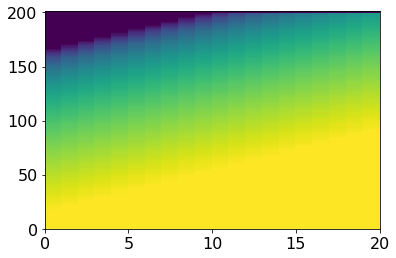

In [6]:
data = output['teos10_layer_nk200']['out_nat']
z = -(data['e'][tidx,:-1,:].values - 0.5*data['h'][tidx,:,:])
xh = np.tile(data.xh,(len(data.zi),1))
plt.pcolormesh(data.e[0,:,:])

In [7]:
np.tile(data.xh,(20,1)).shape

(20, 20)

In [8]:
data

<xarray.Dataset>
Dimensions:    (Time: 2, xh: 20, xq: 20, yq: 4, zi: 201, zl: 200)
Coordinates:
  * xq         (xq) float64 10.0 20.0 30.0 40.0 50.0 ... 170.0 180.0 190.0 200.0
    yh         float64 5.0
  * zl         (zl) float64 1.035e+03 1.035e+03 ... 1.036e+03 1.036e+03
  * Time       (Time) object 0001-01-01 01:00:00 0001-01-01 02:00:00
  * xh         (xh) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
  * yq         (yq) float64 10.0 20.0 30.0 40.0
  * zi         (zi) float64 1.035e+03 1.035e+03 ... 1.036e+03 1.036e+03
Data variables:
    u          (Time, zl, xq) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 nan
    v          (Time, zl, yq, xh) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    h          (Time, zl, xh) float64 1e-15 1e-15 1e-15 ... 97.37 103.3 108.8
    e          (Time, zi, xh) float64 1.6e-14 2e-14 2.4e-14 ... -200.0 -200.0
    temp       (Time, zl, xh) float64 10.48 10.43 10.38 ... 6.87 6.841 6.819
    salt       (Time, zl, xh) float64 34.65 34.66 34.67 ... 34.96 34.97 34.97
    rhoinsitu  (Time, zl, xh) float64 1.026e+03 1.026e+03 ... 1.028e+03
    rhopot0    (Time, zl, xh) float64 1.026e+03 1.026e+03 ... 1.027e+03
    rhopot2    (Time, zl, xh) float64 1.035e+03 1.035e+03 ... 1.036e+03
    dye001     (Time, zl, xh) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    filename:   prog.nc
    title:      GOLD Experiment
    grid_type:  regular
    grid_tile:  N/A

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


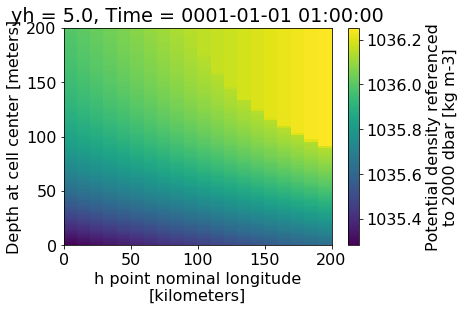

In [9]:
layer = output['teos10_layer_nk200']['out_z']
neutral = output['teos10_linear_nk200']['out_z']
var = 'rhopot2'
(layer[var][0,:,:]).plot()

In [10]:
dz = 2
dt = 3600
g=9.81
rho0 = output['teos10_full_nk200']['out_nat']['rhoinsitu'].mean()-1000
subz = range(10,90)
subx = range(2,19)
rho_ref = output['teos10_layer_nk200']['out_nat']['rhoinsitu'][:,subz,subx]

# z_top = zprime + 0.5*dz
# z_bot = zprime - 0.5*dz

# ref_APE0 = (g*rho_ref[0] * ( z_top**2 - z_bot**2 )).sum()/(rho_ref[0]*(z_top-z_bot)).sum()
# ref_APE1 = (g*rho_ref[1] * ( z_top**2 - z_bot**2 )).sum()/(rho_ref[1]*(z_top-z_bot)).sum()

# ref_N2 = (-g/rho0*rho_ref[0].diff('z_l')/dz).mean()
# kappa_ref = (ref_APE1 - ref_APE0)/(ref_N2*dt)

In [11]:

def calc_APE(data):
    z_top = -data.e[:-1,:].values[::-1,:]
    z_bot = -data.e[1:,:].values[::-1,:]
    num = (g*data.rhoinsitu * (z_top**2 - z_bot**2)).where(data.h>1e-10).sum()
    denom = (data.rhoinsitu * (z_top-z_bot)).where(data.h>1e-10).sum()
    return num/denom

def calc_kappa(data):
    N2_ref = 0.00261
    APE0 = calc_APE(data.isel({'Time':0}))
    APE1 = calc_APE(data.isel({'Time':1}))
    return np.abs(APE1-APE0)/(N2_ref*dt)

In [12]:
rho0 = 1027.49
N2_ref = 0.00261
APE0 = calc_APE(output['teos10_full_nk200']['out_nat'].isel({'Time':0}))
APE1 = calc_APE(output['teos10_full_nk200']['out_nat'].isel({'Time':1}))
kappa = print((APE1-APE0)/(N2_ref*dt))

<xarray.DataArray 'rhoinsitu' ()>
array(-1.05921901e-06)
Coordinates:
    yh       float64 5.0


In [13]:
diff = {}
for case in cases:
    diff[case] = np.zeros(len(levels))
    for zidx, lev in enumerate(levels):
        name = f'{case}_nk{lev}'
        diff[case][zidx] = calc_kappa(output[name]['out_nat'])
        print(f'{case} {lev}: {diff[case][zidx]}')
        
        
        
    


# reference_diff = (g*(output['teos10_layer_nk200']['out_z']['rhopot2'][1,subz,subx]-output['teos10_layer_nk200']['out_z']['rhopot2'][0,subz,:])*zprime*dz).sum('z_l')
# reference_diff = reference_diff / (dt * (output['teos10_layer_nk200']['out_z']['rhopot2'][0,subz,:]*dz).sum('z_l') *N2)
# print('Reference diffusion: ',reference_diff.mean('xh'))
# diff = {}
# for case in cases:
#     diff[case] = np.zeros(len(levels))    
#     for zidx, lev in enumerate(levels):        
#         name = f'{case}_nk{lev}'
#         diff_rho = output[name]['out_z']['rhopot2'][0,subz,subx]-reference
#         APE = (g*diff_rho*output[name]['out_z']['z_l'][subz][::-1]*dz)
#         diff[case][zidx] = (APE.sum('z_l')/(N2*output[name]['out_z']['rhopot2'][1,subz,subx].sum('z_l')*2*dt)).mean('xh')
        
# #         diff[case][zidx]= 
# #         diff[case][zidx] = np.abs(APE.sum('z_l').mean('xh')/3600*gamma)
        
# plt.figure()
# for case in cases:
#     plt.plot(levels,(diff[case]),label=case)
# plt.legend()

teos10_layer 5: 2.5453942844495215e-06
teos10_layer 10: 5.966487087375288e-06
teos10_layer 20: 2.3982600676200083e-06
teos10_layer 40: 4.652440967836183e-07
teos10_layer 80: 1.092025550257234e-06
teos10_layer 160: 9.649340954475703e-07
teos10_layer 200: 9.846638435793975e-07
teos10_full 5: 1.1649383543804335e-06
teos10_full 10: 1.000683233736056e-06
teos10_full 20: 1.0292349401209598e-06
teos10_full 40: 1.0499884021699806e-06
teos10_full 80: 1.057523990708369e-06
teos10_full 160: 1.0593033905702988e-06
teos10_full 200: 1.059219008705008e-06
teos10_int_drho 5: 1.0826747473571653e-08
teos10_int_drho 10: 2.2351763957042954e-07
teos10_int_drho 20: 2.3842172264668118e-08
teos10_int_drho 40: 5.661379467963722e-08
teos10_int_drho 80: 6.809076891557155e-08
teos10_int_drho 160: 6.914850660752808e-08
teos10_int_drho 200: 7.054311838801648e-08
teos10_linear 5: 1.643686380891948e-07
teos10_linear 10: 8.047002655535605e-08
teos10_linear 20: 7.85943389268673e-08
teos10_linear 40: 7.347596293279015e-

In [14]:
dzrho = [   ]

for lev in levels:    
    h = output[f'teos10_layer_nk{lev}']['out_nat']['h'][0,:,:]
    mask = h > 0
    dzrho.append( h.where(mask).mean())

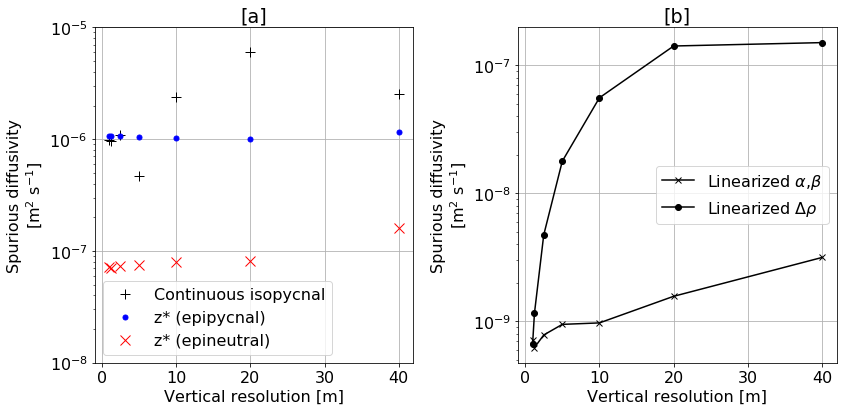

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# dzrho = 400/np.array(levels)
dz = 200/np.array(levels)
plt.semilogy(dzrho[:],(diff['teos10_layer'])[:],'k+',label='Continuous isopycnal',linewidth=2,markersize=10)
plt.semilogy(dz,(diff['teos10_full']),'bo',label='z* (epipycnal)',linewidth=0.1,markersize=5)
# plt.semilogy(dz[:11],(diff['teos10_int_drho'])[:11],'ko',label='z* (isopyncal)',linewidth=0.1,markersize=5)
plt.semilogy(dz,(diff['teos10_neutral']),'rx',label='z* (epineutral)',markersize=10)
# plt.xlim([1.5,5.5])
plt.ylim([1e-8,1e-5])
plt.xlabel('Vertical resolution [m]')
plt.ylabel('Spurious diffusivity\n' + r'[m$^2$ s$^{-1}$]')
plt.grid()
plt.legend()
plt.title('[a]')

plt.subplot(1,2,2)
markers=['x','o']
labels = { 'teos10_linear':r'Linearized $\alpha$,$\beta$', 'teos10_int_drho':r'Linearized $\Delta \rho$'}
for idx, case in enumerate(labels.keys()):
    if ('layer' not in case) and ('full' not in case) and ('neutral' not in case):
        plt.semilogy(dz,np.abs(diff['teos10_neutral']-diff[case]),label=labels[case],color='black',marker=markers[idx])
plt.legend()
# plt.xlim((0,21))
plt.xlabel('Vertical resolution [m]')
plt.ylabel('Spurious diffusivity\n'+r'[m$^2$ s$^{-1}$]')
plt.grid()
plt.title('[b]')
plt.tight_layout()
plt.savefig('/home/ashao/Documents/manuscripts/neutral_diffusion/Diffusivity_teos10.png',dpi=300)

In [16]:
diff

{'teos10_layer': array([2.54539428e-06, 5.96648709e-06, 2.39826007e-06, 4.65244097e-07,
        1.09202555e-06, 9.64934095e-07, 9.84663844e-07]),
 'teos10_full': array([1.16493835e-06, 1.00068323e-06, 1.02923494e-06, 1.04998840e-06,
        1.05752399e-06, 1.05930339e-06, 1.05921901e-06]),
 'teos10_int_drho': array([1.08267475e-08, 2.23517640e-07, 2.38421723e-08, 5.66137947e-08,
        6.80907689e-08, 6.91485066e-08, 7.05431184e-08]),
 'teos10_linear': array([1.64368638e-07, 8.04700266e-08, 7.85943389e-08, 7.34759629e-08,
        7.20354699e-08, 6.96818523e-08, 7.04926151e-08]),
 'teos10_neutral': array([1.61217954e-07, 8.20362091e-08, 7.95644763e-08, 7.44208608e-08,
        7.28160808e-08, 7.03044680e-08, 7.12071386e-08])}

In [17]:
idx

1

In [18]:
dz

array([40.  , 20.  , 10.  ,  5.  ,  2.5 ,  1.25,  1.  ])

KeyError: 'teos10_neutral'

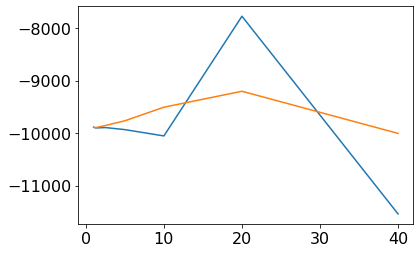

In [19]:
plt.figure()
labels = { 'teos10_linear':r'Linearized $\alpha$, $\beta$', 'teos10_int_drho':r'Linearized $\Delta\rho$' }
for case in diff.keys():
    if ('layer' not in case) and ('full' not in case):
        plt.plot(dz,(diff[case]-diff['teos10_full'])*1e10,label=labels[case])
plt.legend()
plt.xlim((0,41))
plt.xlabel('Vertical resolution [m]')
plt.ylabel('Diffusivity\n'+r'[10$^{-10}$ m$^2$ s$^{-1}$]')
plt.grid()

In [ ]:
popt_int, pcov = curve_fit(lambda dz,a,b,c: a*np.exp(b*dz)+c, dz,1e10*(diff['teos10_int_drho']-diff['teos10_full']))
popt_lin, pcov = curve_fit(lambda dz,a,b,c: a*np.exp(b*dz)+c, dz[:5],1e10*(diff['teos10_linear']-diff['teos10_full'])[:5])

In [ ]:
dz_int = np.linspace(0,300,100)
plt.plot(dz_int,(popt_int[0]*np.exp(popt_int[1]*dz_int)+popt_int[2])*1e-10*1e-5)
plt.plot(dz_int,(popt_lin[0]*np.exp(popt_lin[1]*dz_int)+popt_lin[2])*1e-10*1e-5)
# plt.scatter(dz,1e10*(diff['teos10_int_drho']-diff['teos10_full']))

In [ ]:
(output['teos10_neutral_nk200']['out_z'].salt[0,:,:]-output['teos10_full_nk200']['out_z'].salt[0,:,:]).plot()
plt.ylim(50,150)

In [ ]:
print(output['teos10_full_nk200']['out_nat'].rhopot2.max(),output['teos10_full_nk200']['out_nat'].rhopot2.min())